# Autism Spectrum Disorder Detection

#### Ali Baran Tasdemir - Ahmet Kasim Toptas

Autism Spectrum Disorder (ASD) is a complex neurodevelopmental disorder that impacts how a person socializes with others, causing problems in social interaction and communication. The disorder also includes some limited and repetitive patterns of behavior. ASD includes a wide range of names known in public. For example, one of the most known is "Asperger's syndrome" is thought to be at the mild end of ASD.

There is no cure for ASD. But early and intensive treatment can make a big difference in the lives of many adults and children. Early detection has a key role. Almost half of the children who are diagnosed early and received special education for controlling their behavior make decent developmental progress.
The main problem is that there is no medical test for diagnosing autism. Diagnosis made by specialized doctors with interviews, observations, developmental testing, and analyzing the history of the patient. So diagnosing autism is a time consuming and expensive process. Also diagnosing is limited with the doctors' capability.

The most used technique for the interviewing process is the "AQ-10" test. The AQ-10 test has 10 questions for different age groups of patients. This test tries to detect some stereotyped behaviors and symptoms for ASD patients.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Problem <a class="anchor" id="problem"></a>

The main problems with the diagnosis of the ASD are time and cost. The specialist doctor tries to examine patients' background and applies some sort of tests to the patient. And the time to diagnose a patient is time consuming. 

Early diagnosed patients are more likely to be adapt rest of the world with social relations, etc. So diognosing early is crucial. Also diagnosing phase needs a specialized doctor. In the era of the computers and AI, we think this problem as a machine learning and data science problem. And we are asking ourselves "Can we diagnose ASD for a patient?".

In [0]:
# Original datasets reformatted to csv files. You can download reformatted
# files on github repository. Link in the References section.
df_child = pd.read_csv("Autism-Child-Data.csv")
df_child["Age_group"] = "Child"

df_adolescent = pd.read_csv("Autism-Adolescent-Data.csv")
df_adolescent["Age_group"] = "Adolescent"

df_adult = pd.read_csv("Autism-Adult-Data.csv")
df_adult["Age_group"] = "Adult"

In [5]:
t_r, c = (df_child.shape[0] + df_adolescent.shape[0] + df_adult.shape[0]), (df_child.shape[1])
print("Child Data: {} rows, {} columns.".format(df_child.shape[0], df_child.shape[1]))
print("Adlescent Data: {} rows, {} columns.".format(df_adolescent.shape[0], df_adolescent.shape[1]))
print("Adult Data: {} rows, {} columns.".format(df_adult.shape[0], df_adult.shape[1]))
print("-"*30)
print("Total: {} rows, {} columns.".format(t_r, c))

Child Data: 292 rows, 22 columns.
Adlescent Data: 104 rows, 22 columns.
Adult Data: 704 rows, 22 columns.
------------------------------
Total: 1100 rows, 22 columns.


In [6]:
df_all = pd.concat([df_child, df_adolescent, df_adult], axis=0)
if (t_r == df_all.shape[0]) and (c == df_all.shape[1]):
    print("Success")
else:
    print("Something wrong!")

Success


## Data Understanding<a class="anchor" id="data_understanding"></a>

Diagnosing ASD done mostly by interviewing patient. And the most used technique for this process is a test named "Autism-Spectrum Quotient (AQ)". The "AQ-10" test is the reduced form of the original AQ-Test. The main intuition behind the "AQ-10" test is to use before interviews to construct a baseline for the patient. 

There are 10 question asked during the interview. They are symbolized as A1 to A10 in the dataset. For every age group there are different questions. We will write down only for adult test to demonstrate the tests' content.


---



**Question 1.** I  often  notice  small  sounds  when  others  do not 

**Question 2.** I   usually   concentrate   more   on   the   whole picture, rather than the small details

**Question 3.** I find  it  easy  to  do  more  than  one  thing  at once

**Question 4.** If there is an interruption, I can switch back to what I was doing very quickly

**Question 5.** I find it easy to ‘read between the lines’ whensomeone is talking to me

**Question 6.** I  know  how  to  tell  if  someone  listening  to  meis getting bored

**Question 7.** When  I’m  reading  a  story  I  find  it  difficult  to work out the characters’ intentions

**Question 8.** I like to collect information about categories of things  (e.g.  types  of  car,  types  of  bird,  types of train, types of plant etc)

**Question 9.** I  find  it  easy  to  work  out  what  someone  is thinking or feeling just by looking at their face


**Question 10.** I find it difficult to work out people’s intentions



---
Questions answered by selecting one option from "Definitely Agree", "Slightly Agree", "Slightly Disagree", and "Definitely Disagree".

**SCORING:** Only 1 point can be scored for each question. Score 1 point for Definitely or Slightly  Agree  on  each  of  items  1,  7,  8,  and  10.  Score  1  point  for  Definitely  or  Slightly Disagree on each of items 2, 3, 4, 5, 6, and 9. If the individual scores 6 or above, consider referring them for a specialist diagnostic assessment. [4]



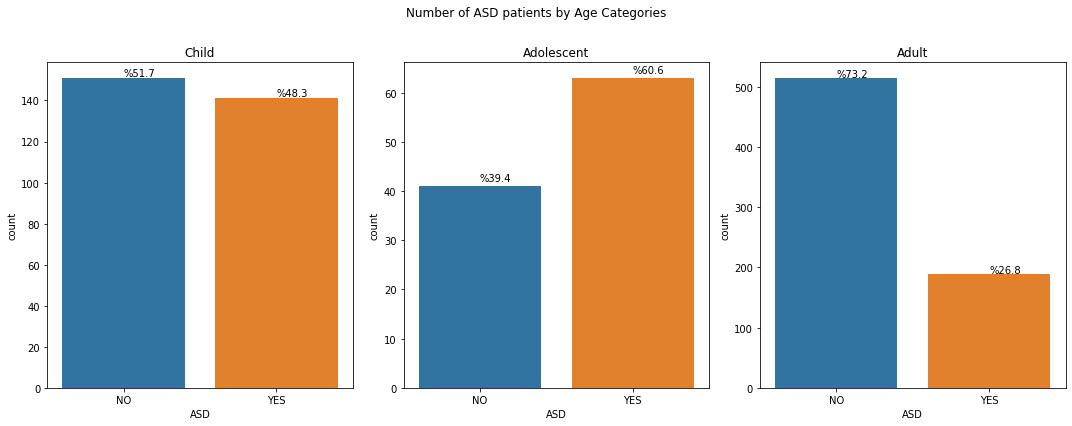

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(131)
ax1 = sns.countplot(df_child["ASD"])

total = len(df_child["ASD"])
for p in ax1.patches:
    ax1.annotate('%{:.1f}'.format((p.get_height()/total)*100), 
                 (p.get_x()+p.get_width()/2, p.get_height()+1))

plt.title("Child")

plt.subplot(132)
ax2 = sns.countplot(df_adolescent["ASD"])

total = len(df_adolescent["ASD"])
for p in ax2.patches:
    ax2.annotate('%{:.1f}'.format((p.get_height()/total)*100), 
                 (p.get_x()+p.get_width()/2, p.get_height()+1))

plt.title("Adolescent")


plt.subplot(133)
ax3 = sns.countplot(df_adult["ASD"])

total = len(df_adult["ASD"])
for p in ax3.patches:
    ax3.annotate('%{:.1f}'.format((p.get_height()/total)*100), 
                 (p.get_x()+p.get_width()/2, p.get_height()+1))

plt.title("Adult")


plt.suptitle("Number of ASD patients by Age Categories")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In the dataset, there are more ASD diagnosed patients in younger age groups. In the other hand, in the adult sample group majority of the data is diagnosed as "Not ASD". 

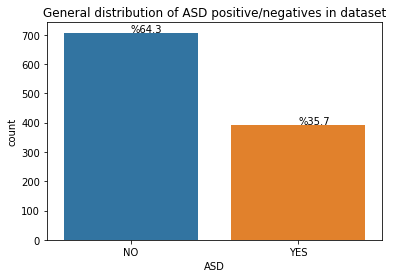

In [8]:
ax = sns.countplot(df_all["ASD"])
plt.title("General distribution of ASD positive/negatives in dataset")
total = len(df_all["ASD"])
for p in ax.patches:
    ax.annotate('%{:.1f}'.format((p.get_height()/total)*100), 
                 (p.get_x()+p.get_width()/2, p.get_height()+1))

Adult dataset has almost 700 samples. But the sum of the child and adolescent datasets has around 400 samples. So when we look the total distribution we see the adult data has more effect on the overall results. 

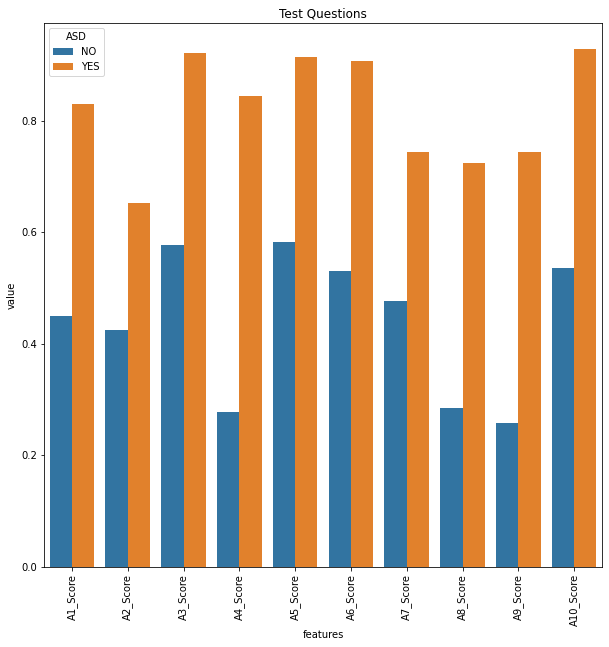

In [9]:
data = pd.melt(pd.concat([df_child["ASD"],df_child.iloc[:,:10]],axis=1),id_vars="ASD",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.barplot(x="features", y="value", hue="ASD", data=data, ci=None)
plt.xticks(rotation=90)
plt.title("Test Questions")
plt.show()

There are 10 different questions in the dataset. And we see -the graph- how was the average responses for both ASD and Not ASD quotents. 

For example, mean response for questions 3, 5 and 10 are above 0.5. That means quotents without ASD answered this questions as positive more or equal than negative. The other thing is that, the questions 3, 5, 6 and 10 answered with a mean of almost 1.0 for the quotents diagnosed as ASD.  

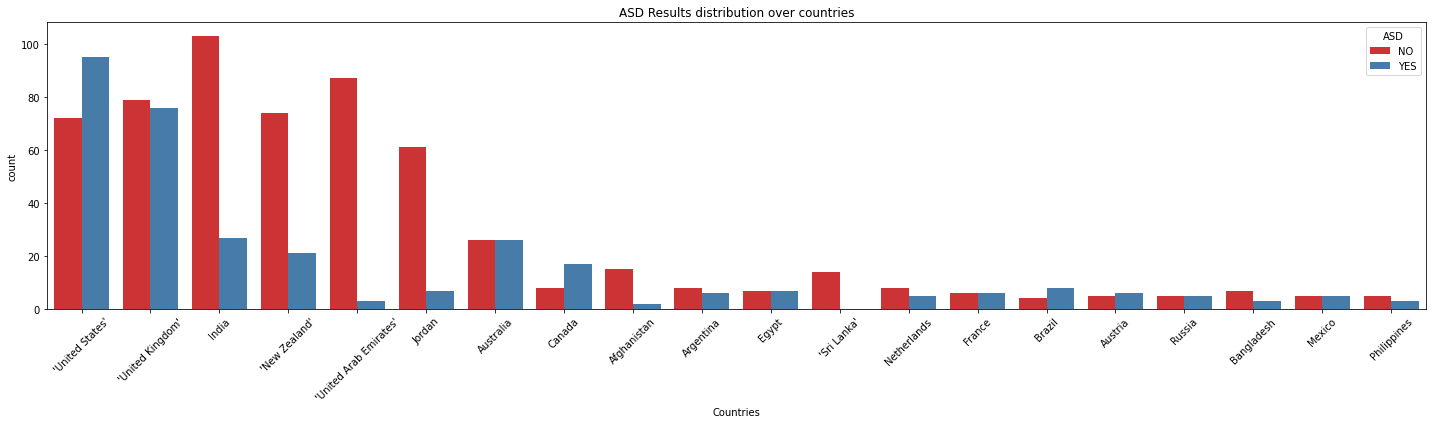

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(x='contry_of_res', data=df_all, order= df_all['contry_of_res'].value_counts().index[:20], hue='ASD',palette='Set1')
# sns.countplot(x='contry_of_res', data=df_all, hue='gender',palette='viridis')
plt.xticks(rotation=45)
plt.title('ASD Results distribution over countries')
plt.xlabel('Countries')
plt.tight_layout()

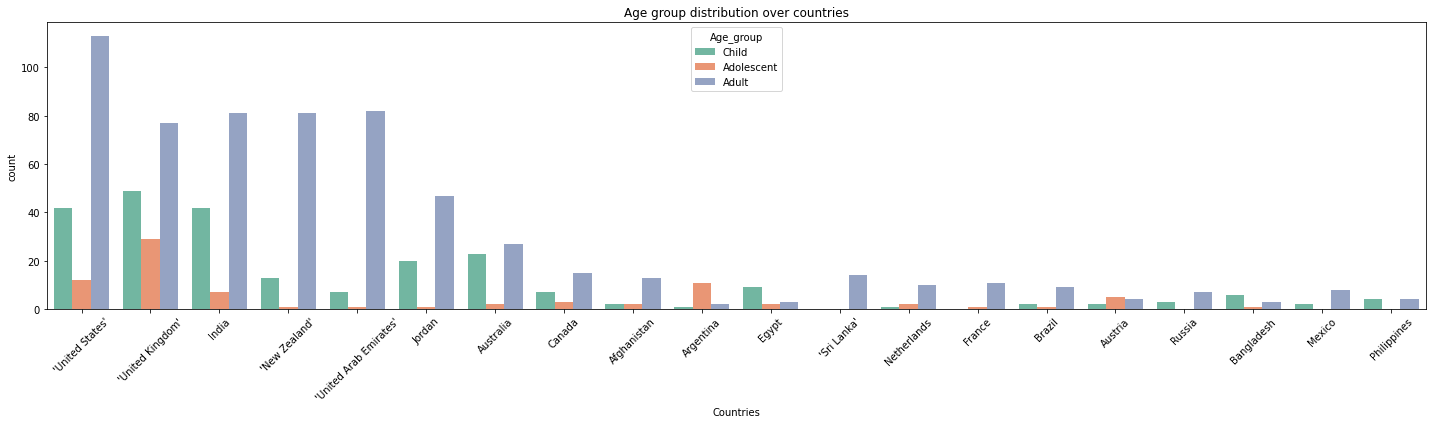

In [11]:
plt.figure(figsize=(20,6))
sns.countplot(x='contry_of_res', data=df_all, order= df_all['contry_of_res'].value_counts().index[:20], hue='Age_group',palette='Set2')
plt.xticks(rotation=45)
plt.title('Age group distribution over countries')
plt.xlabel('Countries')
plt.tight_layout()

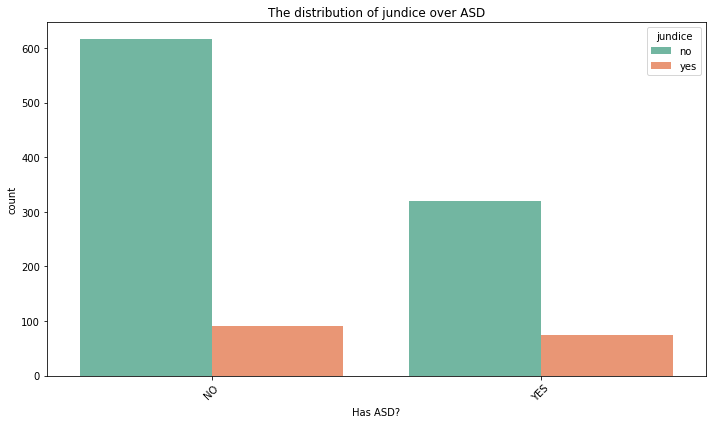

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='ASD', data=df_all, hue='jundice',palette='Set2')
plt.xticks(rotation=45)
plt.title('The distribution of jundice over ASD')
plt.xlabel('Has ASD?')
plt.tight_layout()

As we see on the graph, the jundice distribution over ASD positive and negative is almost equal. By looking the data, jundice seems has not a significant effect on the decision of ASD.

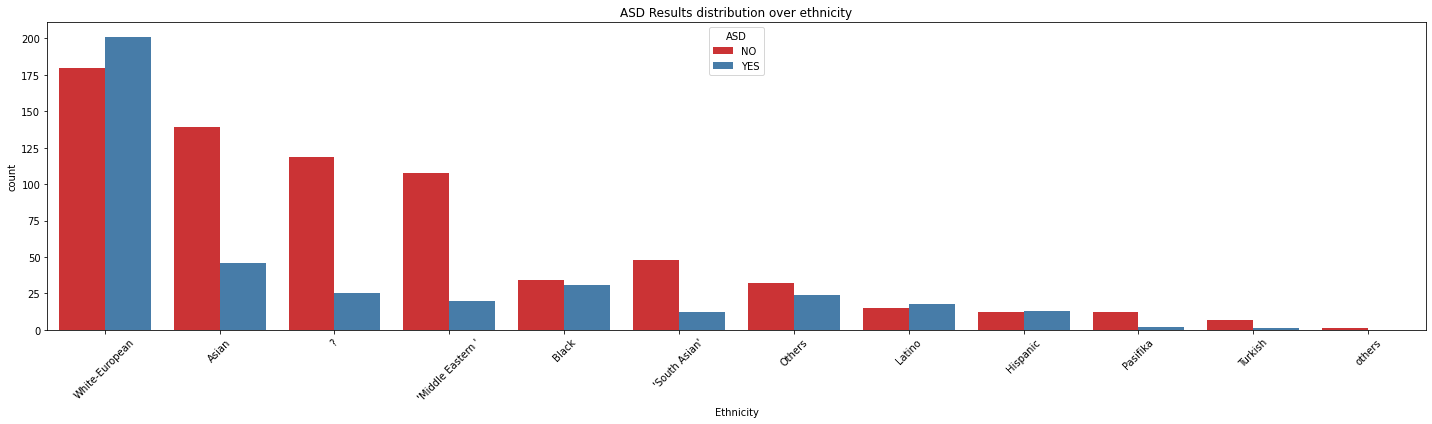

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x='ethnicity', data=df_all, order= df_all['ethnicity'].value_counts().index[:20], hue='ASD',palette='Set1')
# sns.countplot(x='contry_of_res', data=df_all, hue='gender',palette='viridis')
plt.xticks(rotation=45)
plt.title('ASD Results distribution over ethnicity')
plt.xlabel('Ethnicity')
plt.tight_layout()

It seems like ethnicity has no visible effect on the results. But the most of the test takers are White-European people. 

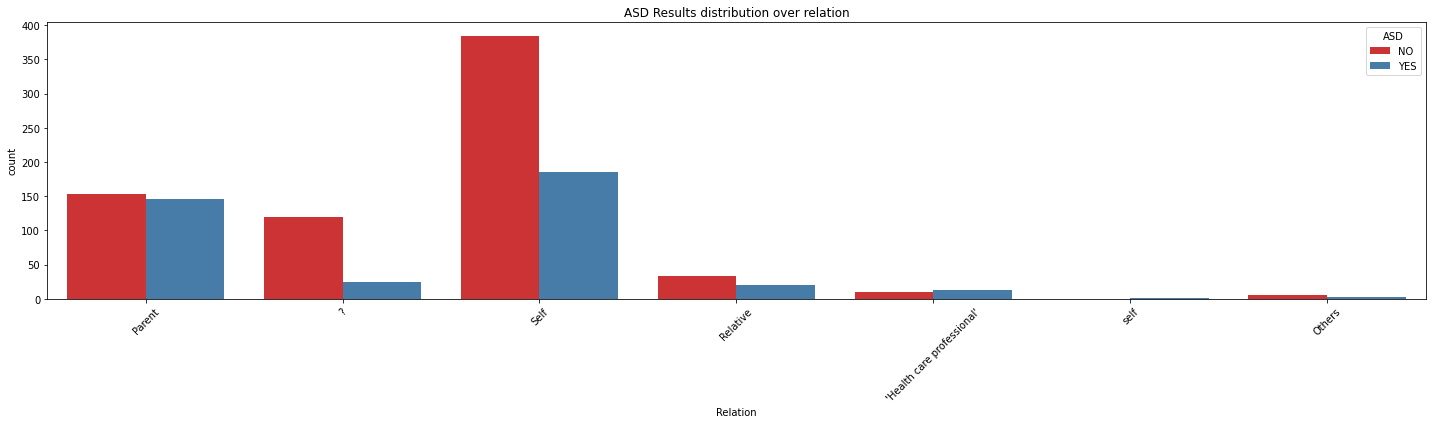

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(x='relation', data=df_all, hue='ASD',palette='Set1')
# sns.countplot(x='contry_of_res', data=df_all, hue='gender',palette='viridis')
plt.xticks(rotation=45)
plt.title('ASD Results distribution over relation')
plt.xlabel('Relation')
plt.tight_layout()

Test results may be biased with the difference of the people answered questions and the people questions answered for.

## Data Preparation<a class="anchor" id="data_preparation"></a>

Data Preparation for our dataset has some steps. Firstly, we will check the null or missing values and handle them. After that, we will handle the categorical values and data type issues (ie., integers represented as strings in the dataset) and finally we will inspect features and we will choose some strategies for using them more effective.

In [15]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         1100 non-null   int64 
 1   A2_Score         1100 non-null   int64 
 2   A3_Score         1100 non-null   int64 
 3   A4_Score         1100 non-null   int64 
 4   A5_Score         1100 non-null   int64 
 5   A6_Score         1100 non-null   int64 
 6   A7_Score         1100 non-null   int64 
 7   A8_Score         1100 non-null   int64 
 8   A9_Score         1100 non-null   int64 
 9   A10_Score        1100 non-null   int64 
 10  age              1100 non-null   object
 11  gender           1100 non-null   object
 12  ethnicity        1100 non-null   object
 13  jundice          1100 non-null   object
 14  austim           1100 non-null   object
 15  contry_of_res    1100 non-null   object
 16  used_app_before  1100 non-null   object
 17  result           1100 non-null   i

#### Missing Values

In the description of the dataset, its written that the null values are symbolized with '?'. So we will replace that with the numpys' null value to make operations easier with pandas.

In [0]:
df_all.replace("?",np.nan,inplace=True)

In [17]:
df_all.shape[0] - (df_all.shape[0] - df_all.isnull().sum())

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  6
gender               0
ethnicity          144
jundice              0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation           144
ASD                  0
Age_group            0
dtype: int64

In [18]:
(df_all.shape[0] - (df_all.shape[0] - df_all.isnull().sum())) /df_all.shape[0] * 100

A1_Score            0.000000
A2_Score            0.000000
A3_Score            0.000000
A4_Score            0.000000
A5_Score            0.000000
A6_Score            0.000000
A7_Score            0.000000
A8_Score            0.000000
A9_Score            0.000000
A10_Score           0.000000
age                 0.545455
gender              0.000000
ethnicity          13.090909
jundice             0.000000
austim              0.000000
contry_of_res       0.000000
used_app_before     0.000000
result              0.000000
age_desc            0.000000
relation           13.090909
ASD                 0.000000
Age_group           0.000000
dtype: float64

In the dataset we have null values for 3 features. These are age, ethnicity and relation. There are only 6 missing age data. But the number of ethnicity and relation is high (144). This number means 13% of the samples has no value for ethnicity and relation.

##### Age

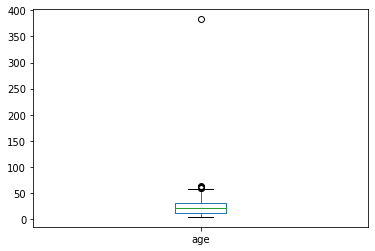

In [19]:
df_all["age"].apply(lambda x:float(x)).plot(kind='box')
plt.show()

We will fill missing 6 value with the mean for the samples' age group. But there are one extreme value as you  see in the boxplot. We should change this value with the same strategy too.

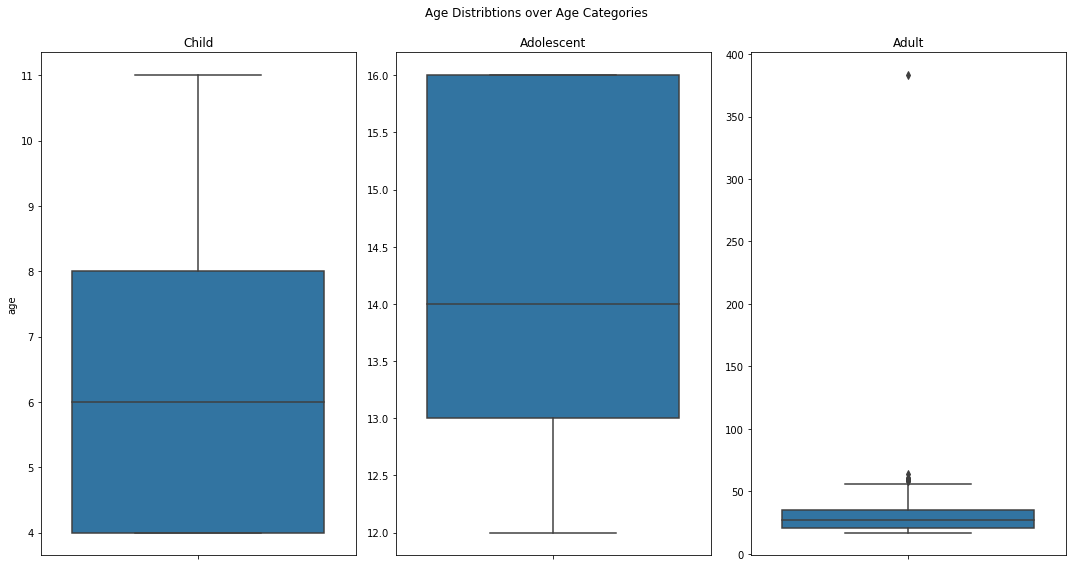

In [20]:
plt.figure(figsize=(15,8))

plt.subplot(131)
sns.boxplot(y=df_all[df_all["Age_group"] == "Child"]["age"].apply(lambda x:float(x)))
plt.title("Child")

plt.subplot(132)
sns.boxplot(y=df_all[df_all["Age_group"] == "Adolescent"]["age"].apply(lambda x:float(x)))
plt.title("Adolescent")
plt.ylabel("")

plt.subplot(133)
sns.boxplot(y=df_all[df_all["Age_group"] == "Adult"]["age"].apply(lambda x:float(x)))
plt.ylabel("")
plt.title("Adult")

plt.suptitle("Age Distribtions over Age Categories")
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [0]:
# Parse age data to float.
df_all["age"] = df_all["age"].apply(lambda x:float(x))

The extreme value is a sample from adult dataset so i will remove and fill that value with the median value of the adult dataset.

In [0]:
avg_child = df_all[df_all["Age_group"] == "Child"]["age"].median()
avg_adolescent = df_all[df_all["Age_group"] == "Adolescent"]["age"].median()
avg_adult =  df_all[df_all["Age_group"] == "Adult"]["age"].median()

In [0]:
# Extreme val removed.
df_all.age.replace(df_all.age.max(), avg_adult, inplace=True)

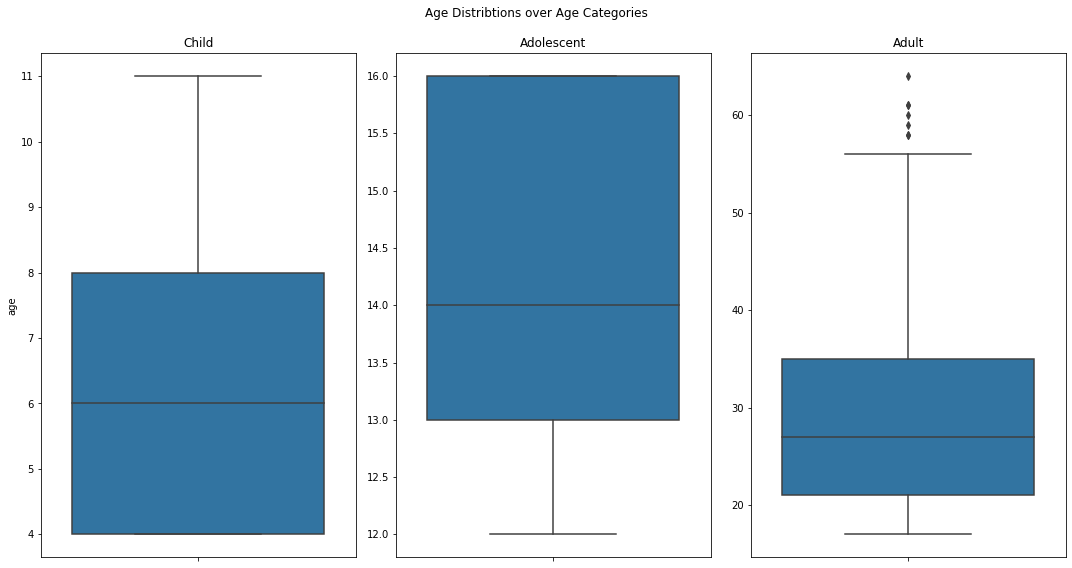

In [24]:
plt.figure(figsize=(15,8))

plt.subplot(131)
sns.boxplot(y=df_all[df_all["Age_group"] == "Child"]["age"])
plt.title("Child")

plt.subplot(132)
sns.boxplot(y=df_all[df_all["Age_group"] == "Adolescent"]["age"])
plt.title("Adolescent")
plt.ylabel("")

plt.subplot(133)
sns.boxplot(y=df_all[df_all["Age_group"] == "Adult"]["age"])
plt.ylabel("")
plt.title("Adult")

plt.suptitle("Age Distribtions over Age Categories")
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

After handling one extreme value now we will replace the missing values with the medians 

In [0]:
# Now we will replace the missing values with corresponding median values.
df_all.loc[((df_all["age"].isna()) & (df_all["Age_group"] == "Adult")), "age"] = avg_adult
df_all.loc[((df_all["age"].isna()) & (df_all["Age_group"] == "Adolescent")), "age"] = avg_adolescent
df_all.loc[((df_all["age"].isna()) & (df_all["Age_group"] == "Child")), "age"] = avg_child

In [26]:
df_all.age.isna().value_counts()

False    1100
Name: age, dtype: int64

##### Ethnicity

For the test like that I dont think like the ethnicity information will be usefull. But we will see the effects on the results later phases. The missing data is 13%. We know that the biggest majority of the data is White-Europians. So we can fill all missing fields as White-European.

In [27]:
df_all.loc[(df_all["ethnicity"].isna()), "ethnicity"] = "White-European"
df_all.loc[df_all["ethnicity"] == "others", "ethnicity"] = "Others"
df_all.ethnicity.value_counts()

White-European       525
Asian                185
'Middle Eastern '    128
Black                 65
'South Asian'         60
Others                57
Latino                33
Hispanic              25
Pasifika              14
Turkish                8
Name: ethnicity, dtype: int64

We replaced all missing values with majority. Also we changed one format mismatching too. There are 56 people with "Others" ethnicity but 1 "others" ethnicity. So we merge two labels

##### Relation

In [28]:
df_all.relation.value_counts()

Self                          571
Parent                        300
Relative                       53
'Health care professional'     23
Others                          8
self                            1
Name: relation, dtype: int64

There are 144 (13%) missing data in the relation column. So we will change these ones with "Others". Also there are 1 "self" and 570 "Self" label. We will merge these two labels too.

In [29]:
df_all.loc[(df_all["relation"].isna()), "relation"] = "Others"
df_all.loc[df_all["relation"] == "self", "relation"] = "Self"
df_all.relation.value_counts()

Self                          572
Parent                        300
Others                        152
Relative                       53
'Health care professional'     23
Name: relation, dtype: int64

In [30]:
df_all.shape[0] - (df_all.shape[0] - df_all.isnull().sum())

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
ASD                0
Age_group          0
dtype: int64

After these steps we cleared all missing data.

#### Feature formatting

In [0]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

In [32]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         1100 non-null   int64  
 1   A2_Score         1100 non-null   int64  
 2   A3_Score         1100 non-null   int64  
 3   A4_Score         1100 non-null   int64  
 4   A5_Score         1100 non-null   int64  
 5   A6_Score         1100 non-null   int64  
 6   A7_Score         1100 non-null   int64  
 7   A8_Score         1100 non-null   int64  
 8   A9_Score         1100 non-null   int64  
 9   A10_Score        1100 non-null   int64  
 10  age              1100 non-null   float64
 11  gender           1100 non-null   object 
 12  ethnicity        1100 non-null   object 
 13  jundice          1100 non-null   object 
 14  austim           1100 non-null   object 
 15  contry_of_res    1100 non-null   object 
 16  used_app_before  1100 non-null   object 
 17  result         

gender, ethnicity, jundice, austim, country_of_res, used_app_before, age_desc, relation, asd and Age_droup feaures are categorical features. To use these featueres on later models we need to represent them with numbers.

In [0]:
# 0-1 binarizers
df_all.jundice = df_all.jundice.apply(lambda x: 0 if x == 'no' else 1)
df_all.austim = df_all.austim.apply(lambda x: 0 if x == 'no' else 1)
df_all.ASD = df_all.ASD.apply(lambda x: 0 if x == 'NO' else 1)
df_all.gender = df_all.gender.apply(lambda x: 0 if x == 'm' else 1)

We will drop some columns now. 

result columns has the overall result over A1_score to A10_score. So this makes this feature redundant.

age_desc column has information about the user is over 18 or not. We dont need that information for a predictor.

used_app_before column has information about the app used for gathering results. So we are not interested with this column too.

In [0]:
df_all.drop(['result', 'age_desc', 'used_app_before'], axis=1, inplace=True)

In [35]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 703
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A1_Score       1100 non-null   int64  
 1   A2_Score       1100 non-null   int64  
 2   A3_Score       1100 non-null   int64  
 3   A4_Score       1100 non-null   int64  
 4   A5_Score       1100 non-null   int64  
 5   A6_Score       1100 non-null   int64  
 6   A7_Score       1100 non-null   int64  
 7   A8_Score       1100 non-null   int64  
 8   A9_Score       1100 non-null   int64  
 9   A10_Score      1100 non-null   int64  
 10  age            1100 non-null   float64
 11  gender         1100 non-null   int64  
 12  ethnicity      1100 non-null   object 
 13  jundice        1100 non-null   int64  
 14  austim         1100 non-null   int64  
 15  contry_of_res  1100 non-null   object 
 16  relation       1100 non-null   object 
 17  ASD            1100 non-null   int64  
 18  Age_group

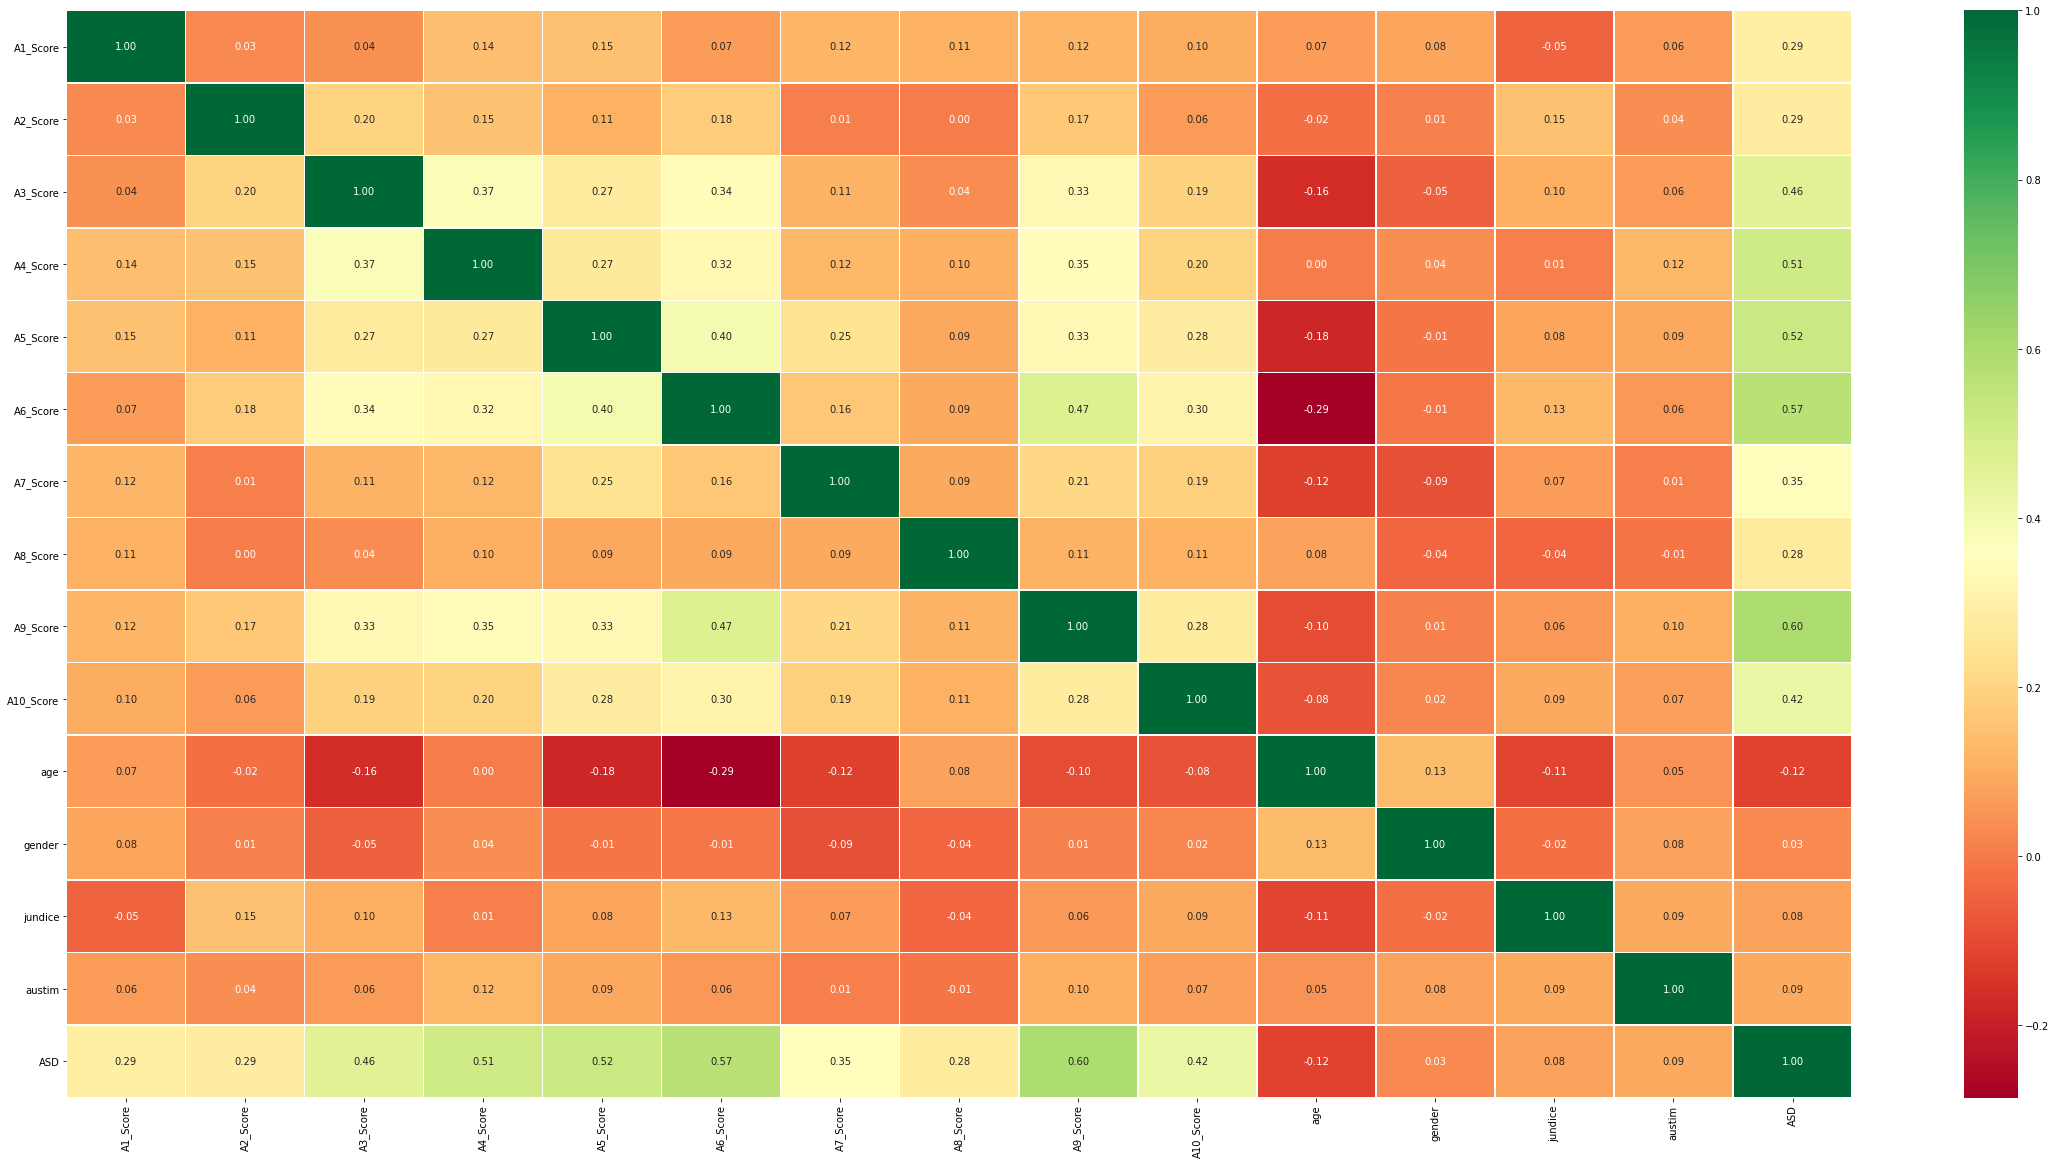

In [36]:
corr = df_all.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

In the correlation matrix there is no strong positive or negative correlation that requires elimination. So our features are not strongly connected. This is a good result for our feature processing phase. So as a result, we don't need to delete any results.

ASD column is the target column. We can see how other features correlated with this column and can predict the importance of the classification model. For example in the correlation map, questions have a strong positive correlation with the target. Also we can see that jaundice, gender, and age columns are not strongly correlated. We had seen these relations in the data exploration by looking at the distributions.

## Modeling<a class="anchor" id="modeling"></a>

First of all we need to prepare the data for classifying models. 

In [0]:
df_all.ethnicity = df_all.ethnicity.str.lower()
df_all.ethnicity = df_all.ethnicity.str.replace("'", "")
df_all.ethnicity = df_all.ethnicity.str.strip()
ethnics = pd.get_dummies(df_all['ethnicity'],drop_first=True)

df_all.contry_of_res = df_all.contry_of_res.str.lower()
df_all.contry_of_res = df_all.contry_of_res.str.replace("'", "")
df_all.contry_of_res = df_all.contry_of_res.str.strip()
res_country = pd.get_dummies(df_all['contry_of_res'],drop_first=True)

df_all.relation = df_all.relation.str.lower()
df_all.relation = df_all.relation.str.replace("'", "")
df_all.relation = df_all.relation.str.strip()
rel_dummy = pd.get_dummies(df_all['relation'],drop_first=True)

In [0]:
df_model = df_all.copy()
df_model.drop(["ethnicity", "contry_of_res", "relation", "Age_group"], axis=1, inplace=True)
df_model = pd.concat([df_model, ethnics, res_country, rel_dummy], axis=1)

In [39]:
df_model.shape

(1100, 116)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def split_data(X, y, test_size=0.2, random_state=0, normalize=False):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=normalize)

    if normalize:
        scaler = MinMaxScaler()
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [0]:
X= df_model.drop(columns=["ASD"])
y= df_model.loc[:,"ASD"]

X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, 
                                              random_state=9, normalize=True)

We used integer values for categorical values and split our data into train and test sets with 20% test - 80% training ratio.

#### Model Selection

We will use Random Forest Trees for this task.

***Random Forest Trees*** algorithm is an ensemble learning method for both classification and regression problems. It separates the data and constructs multiple decision trees. The result is a combination of these decision trees.

The reason for choosing random forest trees is that, it is an ensemble method. Because of that the probability to face with overfitting problem is more unlikely. And also random forest trees can handle data with high dimensions.

In [0]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
def doPrediction(Xin,yin):
    Xin, Xtest, yin, ytest = train_test_split(Xin, yin, test_size=0.20, random_state=9)
    nfolds = 5
    cv = StratifiedKFold(n_splits=nfolds, shuffle=True)

    clasf = RandomForestClassifier()
    cvclasf = GridSearchCV(clasf, param_grid = {
        'n_estimators' : [5,10,25,50,100],
        'criterion' : ['entropy','gini'],
        'max_features' : [0.2,'sqrt',1., None, 'auto'],
        'class_weight' : ['balanced', 'balanced_subsample', None], 
        }, verbose=0,refit=True,
        cv=cv,
        scoring='f1_weighted',
    n_jobs=4)
    
    # Fit GridSearch
    cvclasf.fit(Xin,yin)
    # Take the best classifier
    bclasf = cvclasf.best_estimator_
    # Print out best parameters chosen for given model.
    print("%d-fold best CV params: %s" % (nfolds,cvclasf.best_params_))
    
    return bclasf

In [0]:
def testModel(X_train, y_train):
    
    clasf = doPrediction(X_train, y_train)

    training_score = clasf.score(X_train, y_train)
    print('Accuracy of Random Forest classifier on training set: {:.4f}'.format(training_score))
    print(classification_report(y_train, clasf.predict(X_train)))

    return clasf, training_score

In [45]:
clasf, tr_score = testModel(X_train, y_train)

5-fold best CV params: {'class_weight': None, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 50}
Accuracy of Random Forest classifier on training set: 0.9875
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      0.98      0.98       319

    accuracy                           0.99       880
   macro avg       0.99      0.99      0.99       880
weighted avg       0.99      0.99      0.99       880



We used random forest trees for this task. And trained this model with the training dataset (X_train, y_train). To choose the best resulting parameters we used Grid Search with 5-fold cross-validation. 5-fold cross-validation is a validation method that splits the data into 5 equal pieces and for every piece uses them as test data and the other for as training data. And grid search is a brute force method to test the model for every given parameter to find the best results one.

## Evaluation<a class="anchor" id="evaluation"></a>

In [46]:
y_pred = clasf.predict(X_test)
y_pred_proba = clasf.predict_proba(X_test)
print(y_pred[:20])
print(y_pred.shape, " ", y_test.shape)

[0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1]
(220,)   (220,)


In [47]:
print("Prediction Probabilities for wrong classified samples: ")
print("ASD\tYES\tNO")
for l in y_pred_proba[y_pred != y_test]:
    print("\t{}\t{}".format(l[0], l[1]))

Prediction Probabilities for wrong classified samples: 
ASD	YES	NO
	0.46	0.54
	0.48	0.52
	0.62	0.38
	0.66	0.34
	0.52	0.48
	0.48	0.52
	0.72	0.28
	0.62	0.38
	0.6	0.4
	0.52	0.48
	0.5	0.5
	0.68	0.32
	0.46	0.54


In [48]:
print("The test accuracy for the model is %.3f"% clasf.score(X_test, y_test))

The test accuracy for the model is 0.941


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       146
           1       0.94      0.88      0.91        74

    accuracy                           0.94       220
   macro avg       0.94      0.93      0.93       220
weighted avg       0.94      0.94      0.94       220



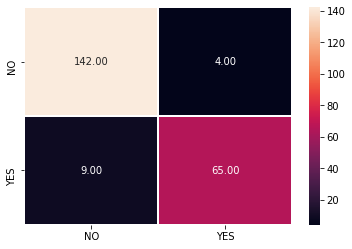

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    data=cm,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    xticklabels=["NO", "YES"],
    yticklabels=["NO", "YES"]
)

fig = plt.gcf()

plt.show()

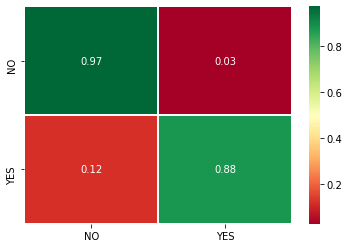

In [51]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(
    data=cm,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=["NO", "YES"],
    yticklabels=["NO", "YES"]
)

fig = plt.gcf()

plt.show()

As we see in the resulting graphs and tables the resulting predictions were pretty high. At the final, our predictor reached 93.6% accuracy rate.

As we mentioned at the beginning of the project, our main goal was to train a model that can "help" to the real specialized doctors before or after the interview process. So in a limited time, instead of face-to-face interviews, doctors can apply an online test and call for face-to-face interviews for positive cases by looking at the online results.

## References<a class="anchor" id="references"></a>

Data Sources:

Data gathered from:

[1] Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.

[2] Thabtah, F. (2017). ASDTests. A mobile app for ASD screening. www.asdtests.com [accessed May 25th, 2020].

[3] Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. Informatics for Health and Social Care Journal. December, 2017 (in press) 

[4] Allison C, Auyeung B, and Baron-Cohen S, (2012) Journal of the American Academy of Child and Adolescent Psychiatry 51(2):202-12.

Data links:
[Adolescent Data](https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++) - [Children](https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++) - [Adult](https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult)

To download datasets and notebook: [Github](https://github.com/alibtasdemir/BBM469-CapstoneProject)


**Disclaimer!** <font color='grey'>This notebook was prepared by Ali Baran Tasdemir and Ahmet Kasim Toptas as a term project for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>